In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 12.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyl

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import numpy as np
import pandas as pd
import mediapipe as mp
import cv2

In [ ]:
import os

image_directory = '/content/gdrive/MyDrive/Spring 2024/CS 4824/Full_Images'

#folderInPath = os.listdir(dataPath)
#for folder in folderInPath:
#  p = dataPath + '/' + folder
#  filesInPath = os.listdir(p)
#  images = [folder]
#  for fil in filesInPath:
#    images.append(p + '/' + fil)
#  print(images)



In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

def process_image(file_path):

  with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.5) as hands:
    for idx, file in enumerate([file_path]):
      # Read an image, flip it around y-axis for correct handedness output (see
      # above).
      image = cv2.flip(cv2.imread(file), 1)
      # Convert the BGR image to RGB before processing.
      # try:
      try:
        results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      except:
        return True
      # except:
      #   continue

      # Print handedness and draw hand landmarks on the image.
      # print('Handedness:', results.multi_handedness)
      if not results.multi_hand_landmarks:
        return False
      image_height, image_width, _ = image.shape
      # annotated_image = image.copy()
      # for hand_landmarks in results.multi_hand_landmarks:
        # if verbose_testing_output:
          # print('hand_landmarks:', hand_landmarks)
          # print(
          #     f'Index finger tip coordinates: (',
          #     f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          #     f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
          # )
          # test_vector = hand_vector(hand_landmarks, mp_hands.HandLandmark.INDEX_FINGER_TIP, mp_hands.HandLandmark.INDEX_FINGER_DIP)
          # print(f'Index Finger Dip to Tip: ', test_vector)
      #  mp_drawing.draw_landmarks(
      #       annotated_image,
      #       hand_landmarks,
      #       mp_hands.HAND_CONNECTIONS,
      #       mp_drawing_styles.get_default_hand_landmarks_style(),
      #       mp_drawing_styles.get_default_hand_connections_style())
      # cv2.imwrite(
      #    '/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
      # Draw hand world landmarks.
      if not results.multi_hand_world_landmarks:
        return None
      # for hand_world_landmarks in results.multi_hand_world_landmarks:
        # print(hand_world_landmarks)
      return results.multi_hand_world_landmarks[0]
        #mp_drawing.plot_landmarks(
        #  hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

In [ ]:
def process_letter(letter, iterations, verbose=False):

  processed = 0
  successes = 0

  all_landmarks = []
  all_flat_landmarks = []

  for i in range(iterations):
    if verbose:
      print(f'Processing {letter}{i+1}.jpg')
    hand = process_image(f'{image_directory}/{letter}/{letter}{i+1}.jpg')
    processed += 1
    if hand is True:
      print(f'Something went wrong with "{letter}{i+1}.jpg".')
      return processed, successes
    if hand is None:
      if verbose:
        print(f'Failed to process {letter}{i+1}.jpg')
      continue
    if hand is False:
      if verbose:
        print(f'Failed to process {letter}{i+1}.jpg')
      continue
    # print(hand)
    landmarks = [(pos.x, pos.y, pos.z) for pos in hand.landmark]
    # print(landmarks)
    all_landmarks.append(landmarks)

    flat_landmarks = []
    for landmark in landmarks:
      for pos in landmark:
        flat_landmarks.append(pos)

    all_flat_landmarks.append(flat_landmarks)
    successes += 1

  df = pd.DataFrame(all_flat_landmarks)
  df.to_csv(f'{image_directory}/{letter}.csv', encoding='utf-8', index=False)

  return processed, successes

In [ ]:
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

for letter in alphabet:

  csv_path = f'{image_directory}/{letter}.csv'
  if os.path.exists(csv_path):
    print(f'Skipping the letter "{letter}", as "{letter}.csv" already exists.')
    continue

  processed, successes = process_letter(letter, 3000, verbose=False)

  print(f'Processed {successes} of {processed} files. [{100 * successes / processed}%]')

Skipping the letter "A", as "A.csv" already exists.
Skipping the letter "B", as "B.csv" already exists.
Skipping the letter "C", as "C.csv" already exists.
Skipping the letter "D", as "D.csv" already exists.
Skipping the letter "E", as "E.csv" already exists.
Skipping the letter "F", as "F.csv" already exists.
Skipping the letter "G", as "G.csv" already exists.
Skipping the letter "H", as "H.csv" already exists.
Skipping the letter "I", as "I.csv" already exists.
Skipping the letter "J", as "J.csv" already exists.
Skipping the letter "K", as "K.csv" already exists.
Skipping the letter "L", as "L.csv" already exists.
Skipping the letter "M", as "M.csv" already exists.
Skipping the letter "N", as "N.csv" already exists.
Skipping the letter "O", as "O.csv" already exists.
Skipping the letter "P", as "P.csv" already exists.
Skipping the letter "Q", as "Q.csv" already exists.
Skipping the letter "R", as "R.csv" already exists.
Skipping the letter "S", as "S.csv" already exists.
Skipping the

In [ ]:
# Need to read features 1-63, group into list of 21 tuples of size 3.

train_landmarks = dict()

for letter in alphabet:

  if not os.path.exists(f'{image_directory}/{letter}.csv'):
    continue

  # List of rows for the letter.
  letter_landmarks = pd.read_csv(f'{image_directory}/{letter}.csv', header=None)
  letter_positions = []

  # Iterate over each row.
  for landmarks in letter_landmarks.iloc:
    positions = []

    # Set of tuples for (x, y, z) for each landmark.
    for i in range(0, 63, 3):
      positions.append((landmarks[i], landmarks[i + 1], landmarks[i + 2]))
    letter_positions.append(positions)

  train_landmarks[letter] = letter_positions

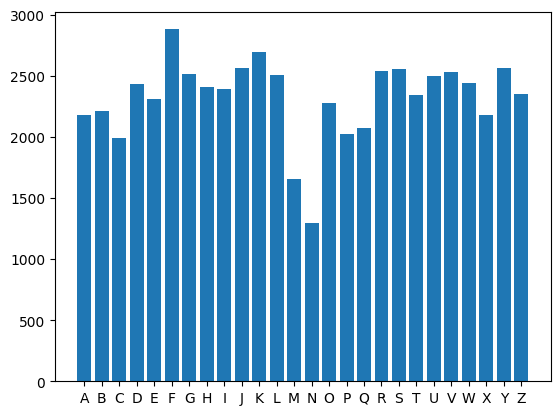

60398 (0.8388611111111111) of the 72,000 files were processed.


In [ ]:
import matplotlib.pyplot as plt

plot_data = {k:len(v) for k,v in train_landmarks.items()}

plt.bar(plot_data.keys(), plot_data.values())
plt.show()

total_proccessed = sum([v for k,v in plot_data.items()])
print(f'{total_proccessed} ({total_proccessed / 72000}) of the 72,000 files were processed.')

Skip the first row of each DataFrame for Angles-LETTER.csv, as they are messed up.

In [ ]:
# Process each set of tuples into angles.

import math

angle_indices = [
    (0, 1, 2),    # 1
    (1, 2, 3),    # 2
    (2, 3, 4),    # 3
    (0, 5, 6),    # 4
    (5, 6, 7),    # 5
    (6, 7, 8),    # 6
    (0, 5, 9),    # 7
    (5, 9, 10),   # 8
    (9, 10, 11),  # 9
    (10, 11, 12), # 10
    (5, 9, 13),   # 11
    (9, 13, 14),  # 12
    (13, 14, 15), # 13
    (14, 15, 16), # 14
    (13, 17, 18), # 15
    (17, 18, 19), # 16
    (18, 19, 20), # 17
    (0, 17, 18)   # 18
]

def angle_from_points(p1, p2, p3):

  v1 = (p2[0] - p1[0], p2[1] - p1[1], p2[2] - p1[2])
  v2 = (p3[0] - p2[0], p3[1] - p2[1], p3[2] - p2[2])

  dot_product = (v1[0] * v2[0]) + (v1[1] * v2[1]) + (v1[2] * v2[2])
  v1_magnitude = (v1[0] ** 2 + v1[1] ** 2 + v1[2] ** 2) ** 0.5
  v2_magnitude = (v2[0] ** 2 + v2[1] ** 2 + v2[2] ** 2) ** 0.5

  angle = math.acos(dot_product / (v1_magnitude * v2_magnitude))

  return angle


all_dataframes = []

for (letter, all_positions) in train_landmarks.items():

  letter_angles = []

  for positions in all_positions:

    angles = []
    for i, j, k in angle_indices:
      p1, p2, p3 = positions[i], positions[j], positions[k]
      angle = angle_from_points(p1, p2, p3)
      angles.append(angle)
    letter_angles.append(angles)

  angles_df = pd.DataFrame(letter_angles)
  angles_df_truncated = angles_df.iloc[1:,:] # Drop the first row.
  angles_df_truncated.to_csv(f'{image_directory}/Angles-{letter}.csv', encoding='utf-8', index=False)

  all_dataframes.append(angles_df_truncated)


compiled_angles = pd.concat([df0 for df0 in all_dataframes], axis=0)
compiled_angles.to_csv(f'{image_directory}/X_Training_Angles.csv', encoding='utf-8', index=False)